In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



def c_s(z):
    return c_s_Ricotti(z)

def v_pbh(z):
    return v_rel_digitized_Ricotti(z)




def x_e(z):
    if z>= z_rec:
        return 1
    else:
        return e_fraction
    
    
def λ_pbh(z, m, v_eff):
    def β_cap_pbh(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff)**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_pbh(z, m):
        return (-1 + np.sqrt(1 + β_cap_pbh(z, m)))/β_cap_pbh(z, m) 
    return np.exp((9/2)/(3 + β_cap_pbh(z, m)**(0.75))) * (x_cr_pbh(z, m)**2)


    
def k(z, m, v_eff):
    return 0.22 * ((1+z)/1000) * (M_halo(z, m)**(2/3)) * (((1e3 * (yr/pc))/v_eff)**2)


def λ_extended(z, m, v_eff):
    alpha = 2.25
    p = 3 - alpha
    power = p/(1-p)
    def β_cap(z, m):
        return 1e-4 * M_halo(z, m) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff)**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr(z, m):
        return   ((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)) 
    def β_cap_h(z, m):
        return (k(z, m, v_eff)**power) *  β_cap(z, m)
    def x_cr_h(z, m):
        return ((k(z, m, v_eff)/2)**power) * ((-1 + np.sqrt(1 + β_cap_h(z, m)))/β_cap_h(z, m)) 
    def gamma_bar(z, m):
        return ((1 + 10 * β_cap_h(z, m))**(1/10)) * np.exp(2 - k(z, m, v_eff)) * ((k(z, m, v_eff)/2)**2)
    return (gamma_bar(z, m)**power) * np.exp((9/2)/(3 + β_cap_h(z, m)**(0.75))) * (x_cr_h(z, m)**2)

def λ_pointmass(z, m, v_eff):
    def β_cap_pointmass(z, m):
        return 1e-4 *  M_halo(z, m) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff)**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_pointmass(z, m):
        return   ((-1 + np.sqrt(1 + β_cap_pointmass(z, m)))/β_cap_pointmass(z, m))
    return np.exp((9/2)/(3 + β_cap_pointmass(z, m)**(0.75))) * (x_cr_pointmass(z, m)**2)

  


def m_dot_pbh_conditional(z, m):
    def m_dot_pbh(z, m, v_eff):
        return  1.8e-3 * λ_pbh(z, m, v_eff) * (((1+z)/1000)**3) *  m * (((5.74e3 * (yr/pc))/v_eff)**3) 
    if m_dot_pbh(z, m, v_eff = v_effA_Ricotti(z)) < 1:
        return m_dot_pbh(z, m, v_eff = v_effA_Ricotti(z))
    else:
        return m_dot_pbh(z, m, v_eff = v_effB_Ricotti(z))

    
    
def m_dot_halo_conditional(z, m):
    def m_dot_halo(z, m, v_eff):
        if k(z, m, v_eff)<2:
            λ_halo = λ_extended(z, m, v_eff)
        else:
            λ_halo = λ_pointmass(z, m, v_eff)
        return 0.016 * λ_halo * ((1+z)/1000) *  m * (((5.74e3 * (yr/pc))/v_eff)**3)
    if m_dot_halo(z, m, v_eff = v_effA_Ricotti(z)) < 1:
        return m_dot_halo(z, m, v_eff = v_effA_Ricotti(z))
    else:
        return m_dot_halo(z, m, v_eff = v_effB_Ricotti(z))
        

/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))
/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))


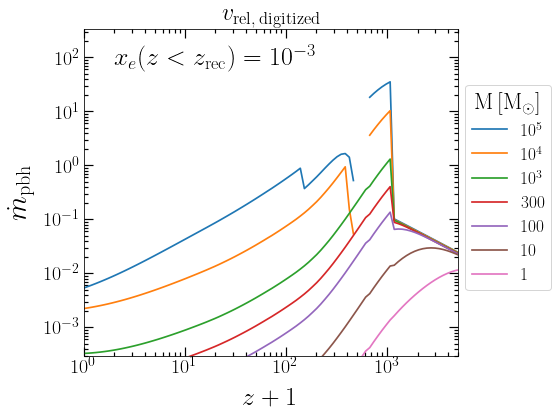

In [2]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1e4, 1, 100)
m_dot_arr = np.zeros(len(z_array))


e_fraction = 1e-3
for i, m in enumerate(mi_arr):
    for i, z in enumerate(z_array):
        m_dot_arr[i] = m_dot_pbh_conditional(z, m)

    plt.loglog(z_array, m_dot_arr)
    

plt.text(2, 70, '$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 26, labelpad = 10)
plt.ylabel(' $\dot m_\mathrm{pbh}$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend( ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'], title = '$  \mathrm{M \, [M_{\odot}]}$',
           title_fontsize = 23, loc = (1.02, 0.2), prop = {"size":17.3})
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title('$\,v_\mathrm{rel,\, digitized}$', fontsize = 24, pad = 8)
plt.savefig('m_dot_pbh_xe1e-3_conditional.pdf', bbox_inches = 'tight')
plt.show()

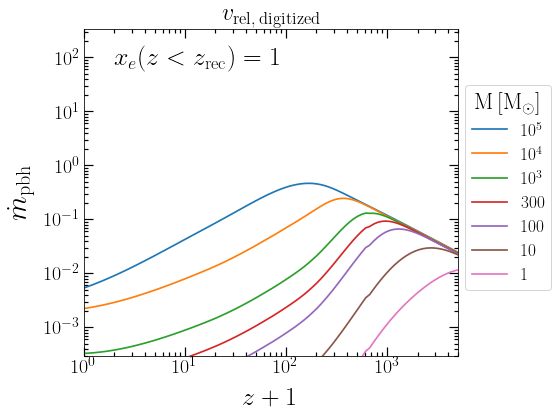

In [3]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 100)
m_dot_arr = np.zeros(len(z_array))



e_fraction = 1
for i, m in enumerate(mi_arr):
    for i, z in enumerate(z_array):
        m_dot_arr[i] = m_dot_pbh_conditional(z, m)

    plt.loglog(z_array, m_dot_arr)
    

plt.text(2, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 26, labelpad = 10)
plt.ylabel(' $\dot m_\mathrm{pbh}$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend( ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'], title = '$  \mathrm{M \, [M_{\odot}]}$',
           title_fontsize = 23, loc = (1.02, 0.2), prop = {"size":17.3})
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title('$\,v_\mathrm{rel,\, digitized}$', fontsize = 24, pad = 8)
plt.savefig('m_dot_pbh_xe1_conditional.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# Plots for PBH with DM halos

/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))
/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))


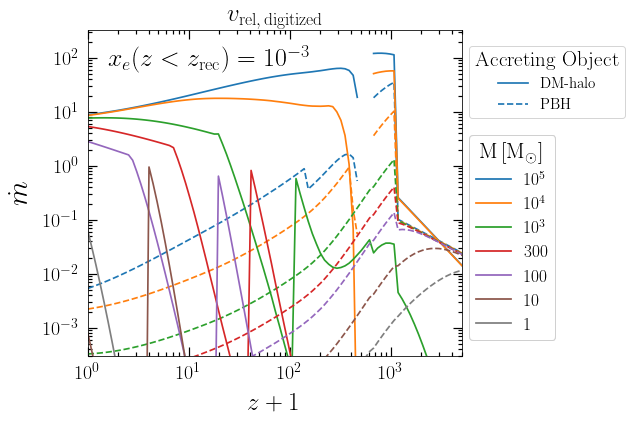

In [4]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_halo_arr = np.zeros(len(z_arr))
m_dot_pbh_arr = np.zeros(len(z_arr))
e_fraction = 1e-3
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_halo_arr[j] = m_dot_halo_conditional(z, m)
        m_dot_pbh_arr[j] = m_dot_pbh_conditional(z, m)
    ax.loglog(z_arr, m_dot_halo_arr, color = color)
    ax.loglog(z_arr, m_dot_pbh_arr, color = color, ls = '--')


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["DM-halo", "PBH"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.73), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0,2,4,6, 8, 10, 12]], [ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
               title = '$  \mathrm{M \, [M_{\odot}]}$', title_fontsize = 22, loc = (1.02, 0.05), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 25, labelpad = 10)
plt.ylabel('$\dot m $', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_halo_xe1e-3_conditional.pdf', bbox_inches = 'tight')
plt.show()

/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))
/home/pratibhajangra/Desktop/ Project 2/2. Mass accretion/Final/accretion.py:243: RuntimeWarning: invalid value encountered in double_scalars
  return  c_s_Ricotti(z) * Mach_number(z) * ((np.sqrt(2/np.pi) * np.log((2/e)*              Mach_number(z)))**(-1/3))


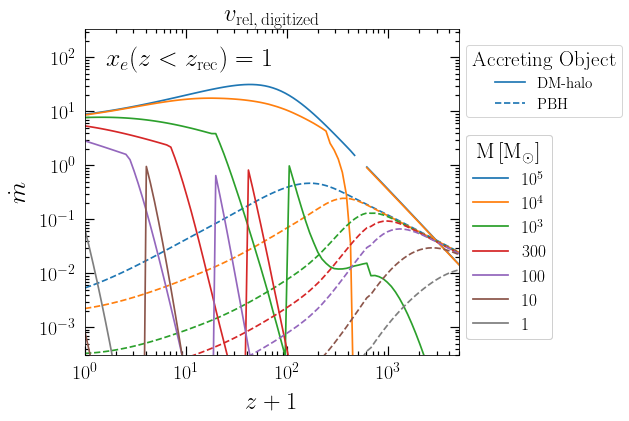

In [5]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_halo_arr = np.zeros(len(z_arr))
m_dot_pbh_arr = np.zeros(len(z_arr))
e_fraction = 1
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_halo_arr[j] = m_dot_halo_conditional(z, m)
        m_dot_pbh_arr[j] = m_dot_pbh_conditional(z, m)
    ax.loglog(z_arr, m_dot_halo_arr, color = color)
    ax.loglog(z_arr, m_dot_pbh_arr, color = color, ls = '--')
    


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["DM-halo", "PBH"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.73), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0,2,4,6, 8, 10, 12]], [ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
               title = '$  \mathrm{M \, [M_{\odot}]}$', title_fontsize = 22, loc = (1.02, 0.05), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m $', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_halo_xe1_conditional.pdf', bbox_inches = 'tight')
plt.show()